# Correlation within the bitcoin data

In [15]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [16]:
data=pd.read_csv('./../data/processed_data.csv')
data.rename(columns={'Unnamed: 0': 'datetime'},inplace=True)
data['datetime']=pd.to_datetime(data['datetime'])
display(data)

,datetime,Open,High,Low,Close,Volume,google_trends,tw_compound,tw_polarity,tw_subjectivity,tweet_volume,re_compound,re_polarity,re_subjectivity
0,2022-01-01 00:00:00,46210.57,46729.73,46210.55,46650.01,8957.465,71.000000,0.228459,0.127819,0.399377,1314.0,0.806147,0.106285,0.464971
1,2022-01-01 01:00:00,46650.00,46944.56,46570.34,46766.78,7276.249,74.227273,0.235804,0.115225,0.380319,1064.0,0.523754,0.165466,0.469433
2,2022-01-01 02:00:00,46767.44,46917.87,46709.44,46796.14,4478.713,74.227273,0.216377,0.094649,0.391375,986.0,0.404721,-0.003025,0.499500
3,2022-01-01 03:00:00,46796.15,46888.00,46746.32,46789.56,4208.992,61.318182,0.254585,0.124391,0.376654,942.0,0.307653,0.129557,0.461581
4,2022-01-01 04:00:00,46789.55,46868.74,46605.00,46690.81,6149.298,61.318182,0.199023,0.106416,0.405293,832.0,0.682042,0.108311,0.422146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2022-06-30 19:00:00,19092.90,19113.40,18951.10,18962.10,20425.187,112.036340,0.097033,0.062959,0.339059,2032.0,0.537786,0.112709,0.459895
4340,2022-06-30 20:00:00,18962.10,19038.20,18843.00,18921.30,32033.326,117.932989,0.096938,0.049762,0.366837,2225.0,0.456615,0.075858,0.494026
4341,2022-06-30 21:00:00,18921.30,19064.70,18563.00,18742.90,43214.413,115.574329,0.112159,0.054471,0.355057,2159.0,0.786424,0.053945,0.433892
4342,2022-06-30 22:00:00,18742.90,18961.00,18711.00,18812.60,34372.158,115.574329,0.104823,0.061164,0.362953,1948.0,0.375062,0.086258,0.452399


In [17]:
diff_data=data.copy()
diff_data

,datetime,Open,High,Low,Close,Volume,google_trends,tw_compound,tw_polarity,tw_subjectivity,tweet_volume,re_compound,re_polarity,re_subjectivity
0,2022-01-01 00:00:00,46210.57,46729.73,46210.55,46650.01,8957.465,71.000000,0.228459,0.127819,0.399377,1314.0,0.806147,0.106285,0.464971
1,2022-01-01 01:00:00,46650.00,46944.56,46570.34,46766.78,7276.249,74.227273,0.235804,0.115225,0.380319,1064.0,0.523754,0.165466,0.469433
2,2022-01-01 02:00:00,46767.44,46917.87,46709.44,46796.14,4478.713,74.227273,0.216377,0.094649,0.391375,986.0,0.404721,-0.003025,0.499500
3,2022-01-01 03:00:00,46796.15,46888.00,46746.32,46789.56,4208.992,61.318182,0.254585,0.124391,0.376654,942.0,0.307653,0.129557,0.461581
4,2022-01-01 04:00:00,46789.55,46868.74,46605.00,46690.81,6149.298,61.318182,0.199023,0.106416,0.405293,832.0,0.682042,0.108311,0.422146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2022-06-30 19:00:00,19092.90,19113.40,18951.10,18962.10,20425.187,112.036340,0.097033,0.062959,0.339059,2032.0,0.537786,0.112709,0.459895
4340,2022-06-30 20:00:00,18962.10,19038.20,18843.00,18921.30,32033.326,117.932989,0.096938,0.049762,0.366837,2225.0,0.456615,0.075858,0.494026
4341,2022-06-30 21:00:00,18921.30,19064.70,18563.00,18742.90,43214.413,115.574329,0.112159,0.054471,0.355057,2159.0,0.786424,0.053945,0.433892
4342,2022-06-30 22:00:00,18742.90,18961.00,18711.00,18812.60,34372.158,115.574329,0.104823,0.061164,0.362953,1948.0,0.375062,0.086258,0.452399


## Granger Causality testing

In [18]:
# Check the stationarity
# ADF test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    print("Results for dickey fuller test")
    results=adfuller(timeseries, autolag='AIC')
    output=pd.Series(results[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, values in results[4].items():
        output['critical value (%s)'%key] =values
    return output

In [19]:
print("Close:",test_stationarity(data['Close']))
print("Google Trends:",test_stationarity(data['google_trends']))
print("Tweets Volume", test_stationarity(data['tweet_volume']))
print("Tweets compound score", test_stationarity(data['tw_compound']))
print("Reddit compound score", test_stationarity(data['re_compound']))
print("Tweets polarity score", test_stationarity(data['tw_polarity']))
print("Reddit polarity score", test_stationarity(data['re_polarity']))
print("Tweets subjectivity score", test_stationarity(data['tw_subjectivity']))
print("Reddit subjectivity score", test_stationarity(data['re_subjectivity']))

Results for dickey fuller test
Close: Test Statistics                  -0.266513
p-value                           0.930115
No. of lags used                  0.000000
Number of observations used    4343.000000
critical value (1%)              -3.431857
critical value (5%)              -2.862206
critical value (10%)             -2.567124
dtype: float64
Results for dickey fuller test
Google Trends: Test Statistics                  -4.921136
p-value                           0.000032
No. of lags used                 31.000000
Number of observations used    4312.000000
critical value (1%)              -3.431867
critical value (5%)              -2.862211
critical value (10%)             -2.567127
dtype: float64
Results for dickey fuller test
Tweets Volume Test Statistics               -1.852801e+01
p-value                        2.104763e-30
No. of lags used               9.000000e+00
Number of observations used    4.334000e+03
critical value (1%)           -3.431860e+00
critical value (5%)

In [20]:
# create difference and returns for the stationarity
data['close_diff']=data['Close'].diff()
data['returns']=data['Close'].pct_change()*100
data['label'] = np.where(data['close_diff']>0, 1 ,0)
data.dropna(inplace=True)
data.set_index('datetime',inplace=True)
display(data)

,Open,High,Low,Close,Volume,google_trends,tw_compound,tw_polarity,tw_subjectivity,tweet_volume,re_compound,re_polarity,re_subjectivity,close_diff,returns,label
datetime,,,,,,,,,,,,,,,,
2022-01-01 01:00:00,46650.00,46944.56,46570.34,46766.78,7276.249,74.227273,0.235804,0.115225,0.380319,1064.0,0.523754,0.165466,0.469433,116.77,0.250311,1
2022-01-01 02:00:00,46767.44,46917.87,46709.44,46796.14,4478.713,74.227273,0.216377,0.094649,0.391375,986.0,0.404721,-0.003025,0.499500,29.36,0.062780,1
2022-01-01 03:00:00,46796.15,46888.00,46746.32,46789.56,4208.992,61.318182,0.254585,0.124391,0.376654,942.0,0.307653,0.129557,0.461581,-6.58,-0.014061,0
2022-01-01 04:00:00,46789.55,46868.74,46605.00,46690.81,6149.298,61.318182,0.199023,0.106416,0.405293,832.0,0.682042,0.108311,0.422146,-98.75,-0.211051,0
2022-01-01 05:00:00,46690.81,47566.66,46657.99,47184.18,14988.008,53.250000,0.272675,0.182279,0.426753,863.0,0.651256,0.086104,0.461059,493.37,1.056675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 19:00:00,19092.90,19113.40,18951.10,18962.10,20425.187,112.036340,0.097033,0.062959,0.339059,2032.0,0.537786,0.112709,0.459895,-130.80,-0.685071,0
2022-06-30 20:00:00,18962.10,19038.20,18843.00,18921.30,32033.326,117.932989,0.096938,0.049762,0.366837,2225.0,0.456615,0.075858,0.494026,-40.80,-0.215166,0
2022-06-30 21:00:00,18921.30,19064.70,18563.00,18742.90,43214.413,115.574329,0.112159,0.054471,0.355057,2159.0,0.786424,0.053945,0.433892,-178.40,-0.942853,0


In [21]:
print('Close_diff:',test_stationarity(data['close_diff']))
print('Returns:',test_stationarity(data['returns']))
print('Direction:',test_stationarity(data['label']))
print('Volume:',test_stationarity(data['Volume']))

Results for dickey fuller test
Close_diff: Test Statistics                 -66.394220
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    4342.000000
critical value (1%)              -3.431857
critical value (5%)              -2.862206
critical value (10%)             -2.567124
dtype: float64
Results for dickey fuller test
Returns: Test Statistics                 -66.234171
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    4342.000000
critical value (1%)              -3.431857
critical value (5%)              -2.862206
critical value (10%)             -2.567124
dtype: float64
Results for dickey fuller test
Direction: Test Statistics                 -41.194692
p-value                           0.000000
No. of lags used                  2.000000
Number of observations used    4340.000000
critical value (1%)              -3.431858
critical value (5%)         

In [22]:
from statsmodels.tsa.stattools import grangercausalitytests

def get_lags_with_granger(data, max_lag):
    pvalues=[]
    result = grangercausalitytests(data, maxlag=max_lag, verbose=False)
    for lag in range(1, max_lag + 1):
        p_value = result[lag][0]['ssr_ftest'][1]
        pvalues.append(p_value)
        # print(f"Lag {lag}: p-value = {p_value}")

    print("Valid Lags:")
    lags=[]
    for index,i in enumerate(pvalues):
        if abs(i) < 0.05:
            # print("Lag {}".format(index+1))
            lags.append(index+1)
    return lags

In [23]:
# close_diff
def granger_test(columns_str,sub_data,results,month,flag):
    sub_data_google=sub_data[[columns_str,'Volume']]
    volume_lag=get_lags_with_granger(sub_data_google, max_lag)
    print("Lags for Volume score:",volume_lag)

    # google trends
    sub_data_google=sub_data[[columns_str,'google_trends']]
    google_lag=get_lags_with_granger(sub_data_google, max_lag)
    print("Lags for google trends score:",google_lag)

    sub_data_google=sub_data[['google_trends',columns_str]]
    google_close_lag=get_lags_with_granger(sub_data_google, max_lag)
    print("Close price to Google trends:",google_close_lag)

    # tweets compound score
    sub_data_tweets_compound=sub_data[[columns_str,'tw_compound']]
    compound_lag=get_lags_with_granger(sub_data_tweets_compound, max_lag)
    print("Lags for tweets compound score:",compound_lag)

    sub_data_tweets_compound=sub_data[['tw_compound',columns_str]]
    compound_close_lag=get_lags_with_granger(sub_data_tweets_compound, max_lag)
    print("Close price to Compound score:",compound_close_lag)

    # tweets polarity score
    sub_data_tweets_polarity=sub_data[[columns_str,'tw_polarity']]
    polarity_lag=get_lags_with_granger(sub_data_tweets_polarity, max_lag)
    print("Lags for tweets polarity score:",polarity_lag)

    sub_data_tweets_polarity=sub_data[['tw_polarity', columns_str]]
    polarity_close_lag=get_lags_with_granger(sub_data_tweets_polarity, max_lag)
    print("Close price to tweets polarity score:",polarity_close_lag)

    # tweets volume
    sub_data_tweets_volume=sub_data[[columns_str,'tweet_volume']]
    twvolume_lag=get_lags_with_granger(sub_data_tweets_volume, max_lag)
    print("Lags for tweets volume score:",twvolume_lag)

    sub_data_tweets_volume=sub_data[['tweet_volume',columns_str]]
    twvolume_close_lag=get_lags_with_granger(sub_data_tweets_volume, max_lag)
    print("Close price to tweets volume score:",twvolume_close_lag)

    # tweets subjectivity score
    sub_data_tweets_subject=sub_data[[columns_str,'tw_subjectivity']]
    subjectivity_lag=get_lags_with_granger(sub_data_tweets_subject, max_lag)
    print("Lags for tweets subjectivity score:",subjectivity_lag)

    # Reddit polarity score
    sub_data_reddit_polarity=sub_data[[columns_str,'re_polarity']]
    re_polarity_lag=get_lags_with_granger(sub_data_reddit_polarity, max_lag)
    print("Lags for reddit polarity score:",re_polarity_lag)

    sub_data_reddit_polarity=sub_data[['re_polarity',columns_str]]
    re_polarity_close_lag=get_lags_with_granger(sub_data_reddit_polarity, max_lag)
    print("Close price to reddit polarity score:",re_polarity_close_lag)

    # Reddit subjectivity score
    sub_data_reddit_subjectivity=sub_data[[columns_str,'re_subjectivity']]
    re_subjectivity_lag=get_lags_with_granger(sub_data_reddit_subjectivity, max_lag)
    print("Lags for reddit subjectivity score:",re_subjectivity_lag)

    # Reddit compound score
    sub_data_reddit_compound=sub_data[[columns_str,'re_subjectivity']]
    re_compound_lag=get_lags_with_granger(sub_data_reddit_compound, max_lag)
    print("Lags for reddit compound score:",re_compound_lag)

    sub_data_reddit_compound=sub_data[['re_subjectivity',columns_str]]
    re_compound_close_lag=get_lags_with_granger(sub_data_reddit_compound, max_lag)
    print("Close price to reddit compound score:",re_compound_close_lag)

    results.append({"Target": columns_str,
                   "Volume score": volume_lag,
    "google trends": google_lag,
                    "Close price to Google trends":google_close_lag,
                    "Tweets compound score": compound_lag,
                    "Close price to Tweets compound score": compound_close_lag,
                    "Tweets polarity score": polarity_lag,
                    "Close price to Tweets polarity score": polarity_close_lag,
                    "Tweets subjectivity score":subjectivity_lag,
                    "Tweets volume":twvolume_lag,
                    "Close price to Tweets volume": twvolume_close_lag,
                    "Reddit compound score": re_compound_lag,
                    "Close price to Reddit compound score": re_compound_close_lag,
                    "Reddit polarity score": re_polarity_lag,
                    "Close price to Reddit polarity score": re_polarity_close_lag,
                    "Reddit subjectivity score": re_subjectivity_lag,
    "Month":month,
    "Flag":flag,})

In [24]:
max_lag = 48  # Set the maximum lag value to consider
def sub_data_test(flag, month,data, results):
    if flag==0:
        sub_data=data[data.index.month==month]
        print("Single Month:",month)
    else:
        sub_data=data[(data.index.month>=1) & (data.index.month <=month)]
        print("Consecutive Months:", month)

    print('Close_diff:\n')
    granger_test('close_diff',sub_data, results,month,flag)

    print('Label:\n')
    granger_test('label',sub_data,results,month, flag)

    print('Returns:\n')
    granger_test('returns', sub_data,results,month, flag)


In [25]:
month = [1,2,3,4,5,6]
flag=0
results=[]
for m in tqdm(month, total=len(month)):
    sub_data_test(flag, m, data, results)

  0%|          | 0/6 [00:00<?, ?it/s]

Single Month: 1
Close_diff:

Valid Lags:
Lags for Volume score: []
Valid Lags:
Lags for google trends score: [10, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Close price to Google trends: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets compound score: []
Valid Lags:
Close price to Compound score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets polarity score: []
Valid Lags:
Close price to tweets polarity score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Valid Lags:
Lags for tweets volume score: []
Valid Lags:
Close price to tweets volume score: []
Valid Lags:
Lags for tweets s

 17%|█▋        | 1/6 [00:18<01:34, 18.90s/it]

Valid Lags:
Close price to reddit compound score: []
Single Month: 2
Close_diff:

Valid Lags:
Lags for Volume score: [1, 2, 3, 4, 5, 17, 18, 19, 20, 21, 22]
Valid Lags:
Lags for google trends score: [1, 2, 7, 8, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24]
Valid Lags:
Close price to Google trends: [1]
Valid Lags:
Lags for tweets compound score: []
Valid Lags:
Close price to Compound score: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Valid Lags:
Lags for tweets polarity score: []
Valid Lags:
Close price to tweets polarity score: []
Valid Lags:
Lags for tweets volume score: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Valid Lags:
Close price to tweets volume score: []
Valid Lags:
Lags for tweets subjectivity score: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 27, 37, 39]
Valid Lags:
Lags for reddit polarity score: []
Valid Lags:
Close price to reddit polarity score: []
Valid Lags:
Lags for reddit subject

 33%|███▎      | 2/6 [00:40<01:22, 20.73s/it]

Valid Lags:
Close price to reddit compound score: []
Single Month: 3
Close_diff:

Valid Lags:
Lags for Volume score: []
Valid Lags:
Lags for google trends score: []
Valid Lags:
Close price to Google trends: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 22, 23]
Valid Lags:
Lags for tweets compound score: []
Valid Lags:
Close price to Compound score: [1]
Valid Lags:
Lags for tweets polarity score: [13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Valid Lags:
Close price to tweets polarity score: []
Valid Lags:
Lags for tweets volume score: []
Valid Lags:
Close price to tweets volume score: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Valid Lags:
Lags for tweets subjectivity score: []
Valid Lags:
Lags for reddit polarity score: []
Valid Lags:
Close price to reddit polarity score: []
Valid Lags:
Lags for reddit subjectivity score: []
Valid Lags:
Lags for reddit compound score: []
Valid Lags:
Close price to reddit compound score: []
Label:

Valid Lags:
Lags for Volume score: []
Valid Lags:

 50%|█████     | 3/6 [00:56<00:55, 18.40s/it]

Valid Lags:
Close price to reddit compound score: []
Single Month: 4
Close_diff:

Valid Lags:
Lags for Volume score: []
Valid Lags:
Lags for google trends score: [22, 25, 26, 27]
Valid Lags:
Close price to Google trends: [1, 2, 4, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets compound score: [10]
Valid Lags:
Close price to Compound score: [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Valid Lags:
Lags for tweets polarity score: [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48]
Valid Lags:
Close price to tweets polarity score: [12, 14, 48]
Valid Lags:
Lags for tweets volume score: [5, 6, 7, 8]
Valid Lags:
Close price to tweets volume score: [9, 10, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32]
Valid Lags:
Lags for tweets subjectivity score: [2]
Valid Lags:
Lags

 67%|██████▋   | 4/6 [01:14<00:36, 18.23s/it]

Valid Lags:
Close price to reddit compound score: [16, 17, 22, 23, 24]
Single Month: 5
Close_diff:

Valid Lags:
Lags for Volume score: [3, 4, 5, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for google trends score: [22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Close price to Google trends: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets compound score: []
Valid Lags:
Close price to Compound score: [5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 20, 23, 24, 26, 27, 28]
Valid Lags:
Lags for tweets polarity score: []
Valid Lags:
Close price to tweets polarity score: []
Valid Lags:
Lags for tweets volume score: []
Valid Lags:
Close price to tweets volume score: []
Valid Lags:
Lags fo

 83%|████████▎ | 5/6 [01:30<00:17, 17.57s/it]

Valid Lags:
Close price to reddit compound score: []
Single Month: 6
Close_diff:

Valid Lags:
Lags for Volume score: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31]
Valid Lags:
Lags for google trends score: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Close price to Google trends: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets compound score: [1, 2, 3, 4, 10, 12, 13]
Valid Lags:
Close price to Compound score: [9, 14, 18]
Valid Lags:
Lags for tweets polarity score: []
Valid Lags:
Close price to tweets polarity score: [2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36]
Valid Lags:
Lags for tweets volume score: [5, 6, 7, 8, 9, 10, 11, 12

100%|██████████| 6/6 [01:48<00:00, 18.14s/it]

Valid Lags:
Close price to reddit compound score: []


In [26]:
flag = 1
for m in tqdm(month, total=len(month)):
    sub_data_test(flag, m, data,results)

  0%|          | 0/6 [00:00<?, ?it/s]

Consecutive Months: 1
Close_diff:

Valid Lags:
Lags for Volume score: []
Valid Lags:
Lags for google trends score: [10, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Close price to Google trends: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets compound score: []
Valid Lags:
Close price to Compound score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets polarity score: []
Valid Lags:
Close price to tweets polarity score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Valid Lags:
Lags for tweets volume score: []
Valid Lags:
Close price to tweets volume score: []
Valid Lags:
Lags for tw

 17%|█▋        | 1/6 [00:15<01:16, 15.37s/it]

Valid Lags:
Close price to reddit compound score: []
Consecutive Months: 2
Close_diff:

Valid Lags:
Lags for Volume score: []
Valid Lags:
Lags for google trends score: [1, 10, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Close price to Google trends: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets compound score: []
Valid Lags:
Close price to Compound score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets polarity score: []
Valid Lags:
Close price to tweets polarity score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 20]
Valid Lags:
Lags for tweets volume score: [1, 11, 28, 29, 30, 31, 32, 33, 34, 35, 3

 33%|███▎      | 2/6 [00:36<01:14, 18.59s/it]

Valid Lags:
Close price to reddit compound score: []
Consecutive Months: 3
Close_diff:

Valid Lags:
Lags for Volume score: []
Valid Lags:
Lags for google trends score: [10, 12, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Close price to Google trends: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets compound score: []
Valid Lags:
Close price to Compound score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets polarity score: []
Valid Lags:
Close price to tweets polarity score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Valid Lags:
Lags for tweets volume score: [1, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Valid La

 50%|█████     | 3/6 [01:10<01:17, 25.83s/it]

Valid Lags:
Close price to reddit compound score: []
Consecutive Months: 4
Close_diff:

Valid Lags:
Lags for Volume score: []
Valid Lags:
Lags for google trends score: [10, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Close price to Google trends: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets compound score: []
Valid Lags:
Close price to Compound score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets polarity score: []
Valid Lags:
Close price to tweets polarity score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Valid 

 67%|██████▋   | 4/6 [01:55<01:07, 33.52s/it]

Valid Lags:
Close price to reddit compound score: [3, 4]
Consecutive Months: 5
Close_diff:

Valid Lags:
Lags for Volume score: [2, 3, 4, 27, 28, 29, 30]
Valid Lags:
Lags for google trends score: [10, 11, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Close price to Google trends: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets compound score: []
Valid Lags:
Close price to Compound score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets polarity score: []
Valid Lags:
Close price to tweets polarity score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,

 83%|████████▎ | 5/6 [02:53<00:42, 42.12s/it]

Valid Lags:
Close price to reddit compound score: []
Consecutive Months: 6
Close_diff:

Valid Lags:
Lags for Volume score: [2, 3, 24, 26, 27, 28, 29, 30, 31, 32]
Valid Lags:
Lags for google trends score: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Close price to Google trends: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets compound score: []
Valid Lags:
Close price to Compound score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Valid Lags:
Lags for tweets polarity score: []
Valid Lags:
Close price to tweets polarity score: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13

100%|██████████| 6/6 [03:41<00:00, 36.97s/it]

Valid Lags:
Close price to reddit compound score: [5]


In [27]:
results=pd.DataFrame(results)
results.to_csv('correlation1.csv', index=False)

<Axes: >

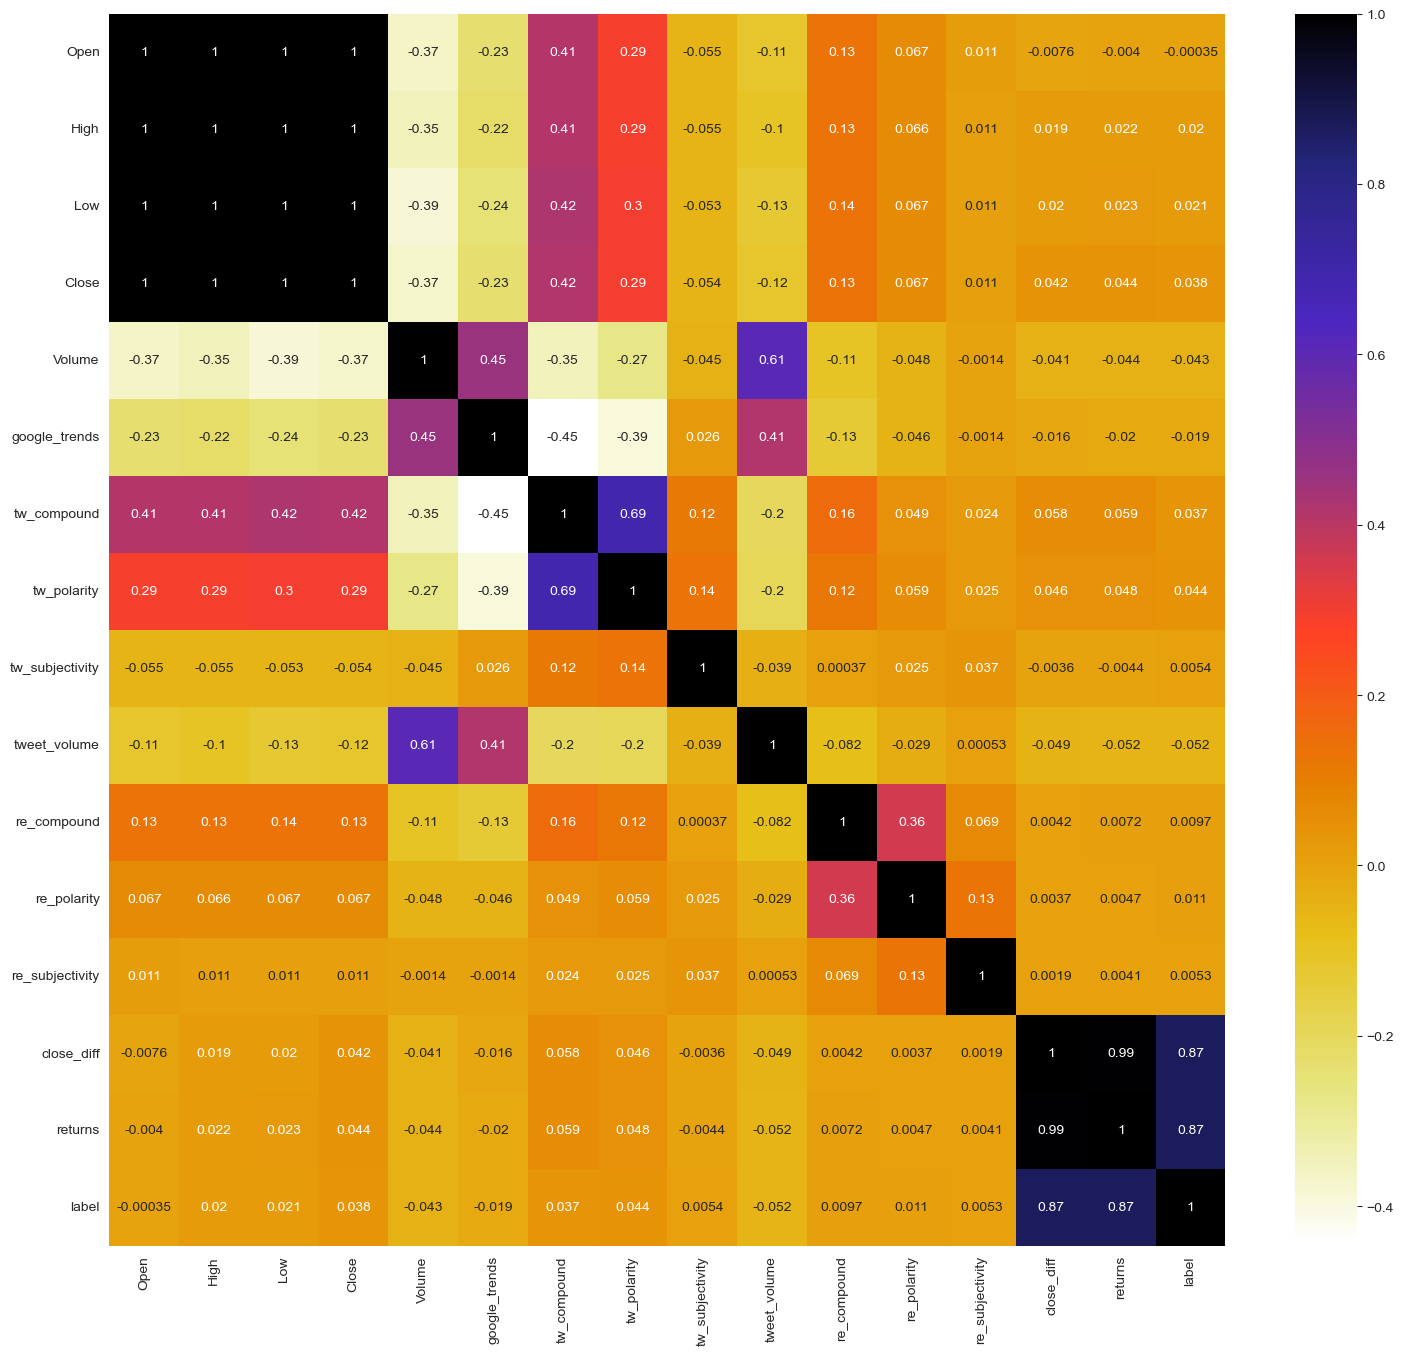

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap=plt.cm.CMRmap_r)